# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [4]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [5]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [6]:
# Your code here:

fifa.head()



,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [7]:
# Your code here:
fifa['Value'].unique()

def transform_num(x):
    x = x.replace('€', '')
    if 'M' in x:
        return float(x.replace('M', ''))
    elif 'K' in x:
        return 0.001 * float(x.replace('K', ''))
    
    
fifa['ValueNumeric'] = fifa['Value'].apply(lambda x: transform_num(x))

fifa.head()



,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

fifa.head()
modelo = ols("ValueNumeric ~ C(fifa['Preferred Foot']) + C(Position)", data=fifa).fit()
modelo = ols("ValueNumeric ~ C(fifa['Preferred Foot'],Sum) * C(Position,Sum)", data=fifa).fit()
modelo = ols("ValueNumeric ~ C(fifa['Preferred Foot']) * C(Position)", data=fifa).fit()
#Vi que habia tres maneras de poner los argumentos par ols, los resultados son similares,
#hay alguno que sea incorrecto? 
anova = sm.stats.anova_lm(modelo, typ = 2)
anova




,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),231.646105,1.0,7.570476,5.939195e-03
C(Position),16596.095506,26.0,20.860790,2.309558e-96
C(fifa['Preferred Foot']):C(Position),5182.139505,26.0,6.513793,7.422724e-23
Residual,546277.142441,17853.0,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
# Your conclusions here:
#Pvalue > a 
#not reject null hipothesis  


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
# Your code here:

model = ols("ValueNumeric ~ C(Nationality)", fifa).fit()
anova = sm.stats.anova_lm(model, typ = 2)
anova

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Nationality),33035.324683,163.0,6.732612,2.370904e-132
Residual,535589.667783,17792.0,NaN,NaN


What is your conclusion from this ANOVA?

In [11]:
# p value > a not reject null hipothesis

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
# Your code here:
fifa.isna().sum() /fifa.shape[0]

fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [13]:
# Your code here:

Y = fifa['ValueNumeric']
X = fifa[['Stamina', 'SprintSpeed']]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
results.params

results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          2.64e-192
Time:                        18:59:00   Log-Likelihood:                -55923.
No. Observations:               17907   AIC:                         1.119e+05
Df Residuals:                   17904   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0722      0.197    -15.576      0.000      -3.459      -2.686
Stamina         0.0604      0.003     18.346      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.376      0.000       0.019       0.033
==============================================================================
Omnibus:                    22822.402   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4639541.011
Skew:                           7.039   Prob(JB):                         0.00
Kurtosis:                      80.588   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [14]:
# Your conclusions here:
if 2.64e-192 < 0.05:
    print("si")

#Reject null hipothesis 
# R-squared = 0.048 means our model isnt very effective 

si


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [15]:
# Your code here:
Y = fifa['ValueNumeric']
X = fifa['Potential'] 
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
results.params

results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:59:01   Log-Likelihood:                -52693.
No. Observations:               17907   AIC:                         1.054e+05
Df Residuals:                   17905   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.5212      0.400    -88.778      0.000     -36.305     -34.737
Potential      0.5323      0.006     95.252      0.000       0.521       0.543
==============================================================================
Omnibus:                    23011.631   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6334620.314
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                      94.068   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [16]:
# Your conclusions here:

#P value < a 
#H1 
#r squared is very low so there is a lot of variation 

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

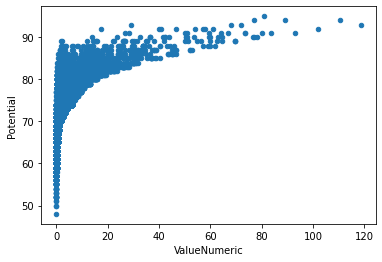

In [17]:
# Your code here:

fifa.plot.scatter('ValueNumeric', 'Potential')